# **Mounting at Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraies**

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## **Data Preprocessing**

In [ ]:
calories = pd.read_csv('/content/drive/MyDrive/calories.csv')
print(calories.head())
print(calories.shape)
print(calories.isnull().sum())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
(15000, 2)
User_ID     0
Calories    0
dtype: int64


In [ ]:
exercise = pd.read_csv('/content/drive/MyDrive/exercise.csv')
print(exercise.head())
print(exercise.shape)
print(exercise.isnull().sum())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
(15000, 8)
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [ ]:
#deleting some rows from calories and exercises
rows_to_delete = 500

random_indices = random.sample(range(len(calories)), rows_to_delete)
calories.drop(random_indices, inplace = True)

print(f"Shape of calories {calories.shape}\n")

rows_to_delete = 500

random_indices = random.sample(range(len(exercise)), rows_to_delete)
exercise.drop(random_indices, inplace = True)

print(f"Shape of exercise {exercise.shape}\n")


Shape of calories (14500, 2)

Shape of exercise (14500, 8)



In [ ]:
#placing random null values in the data

null_percentage = 0.01

num_rows, num_cols = calories.shape
num_nulls = int(null_percentage * num_rows * num_cols)
print(f"null {num_nulls}")

chosen_indices = set()

while len(chosen_indices) < num_nulls:
    random_row = random.randint(0, num_rows - 1)
    random_col = random.randint(1, num_cols - 1)
    chosen_indices.add((random_row, random_col))

for row, col in chosen_indices:
    calories.iat[row, col] = np.nan

null_counts = calories.isnull().sum()

print(null_counts)
calories.head()

num_rows, num_cols = exercise.shape
num_nulls = int(null_percentage * num_rows * num_cols)
print(f"null {num_nulls}")

chosen_indices = set()

while len(chosen_indices) < num_nulls:
    random_row = random.randint(0, num_rows - 1)
    random_col = random.randint(1, num_cols - 1)
    chosen_indices.add((random_row, random_col))

for row, col in chosen_indices:
    exercise.iat[row, col] = np.nan

null_counts = exercise.isnull().sum()

print(null_counts)
exercise.head()

null 290
User_ID       0
Calories    290
dtype: int64
null 1160
User_ID         0
Gender        170
Age           168
Height        162
Weight        162
Duration      165
Heart_Rate    173
Body_Temp     160
dtype: int64


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68.0,190.0,94.0,29.0,105.0,40.8
2,11179863,male,69.0,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34.0,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27.0,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36.0,151.0,50.0,23.0,96.0,40.7


In [ ]:
#merging two datasets

cal_ex = pd.merge(calories, exercise, on = "User_ID")
cal_ex.to_csv("/content/drive/MyDrive/cal_ex.csv", index = False)

print(f"Shape of cal_ex {cal_ex.shape}\n")

null_counts = cal_ex.isnull().sum()

print(null_counts)
cal_ex.head()

Shape of cal_ex (14014, 9)

User_ID         0
Calories      279
Gender        166
Age           159
Height        162
Weight        156
Duration      159
Heart_Rate    167
Body_Temp     152
dtype: int64


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68.0,190.0,94.0,29.0,105.0,40.8
1,11179863,26.0,male,69.0,179.0,79.0,5.0,88.0,38.7
2,16180408,NaN,female,34.0,179.0,71.0,13.0,100.0,40.5
3,17771927,35.0,female,27.0,154.0,58.0,10.0,81.0,39.8
4,15130815,123.0,female,36.0,151.0,50.0,23.0,96.0,40.7


In [ ]:
#imputing missing values and removing categorical null values
cal_ex = cal_ex.fillna(cal_ex.mean())
null_counts = cal_ex.isnull().sum()
print(null_counts)
print(cal_ex.shape)


cal_ex = cal_ex.dropna()
null_counts = cal_ex.isnull().sum()
print(null_counts)
print(cal_ex.shape)



User_ID         0
Calories        0
Gender        166
Age             0
Height          0
Weight          0
Duration        0
Heart_Rate      0
Body_Temp       0
dtype: int64
(14014, 9)
User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
(13848, 9)


<ipython-input-8-4d6d61f0b4f8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cal_ex = cal_ex.fillna(cal_ex.mean())


In [ ]:
#encoding categorical column
cal_ex['Gender']= LabelEncoder().fit_transform(cal_ex['Gender'])
cal_ex.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.000000,1,68.0,190.0,94.0,29.0,105.0,40.8
1,11179863,26.000000,1,69.0,179.0,79.0,5.0,88.0,38.7
2,16180408,89.233345,0,34.0,179.0,71.0,13.0,100.0,40.5
3,17771927,35.000000,0,27.0,154.0,58.0,10.0,81.0,39.8
4,15130815,123.000000,0,36.0,151.0,50.0,23.0,96.0,40.7


# **Dataset visualization**

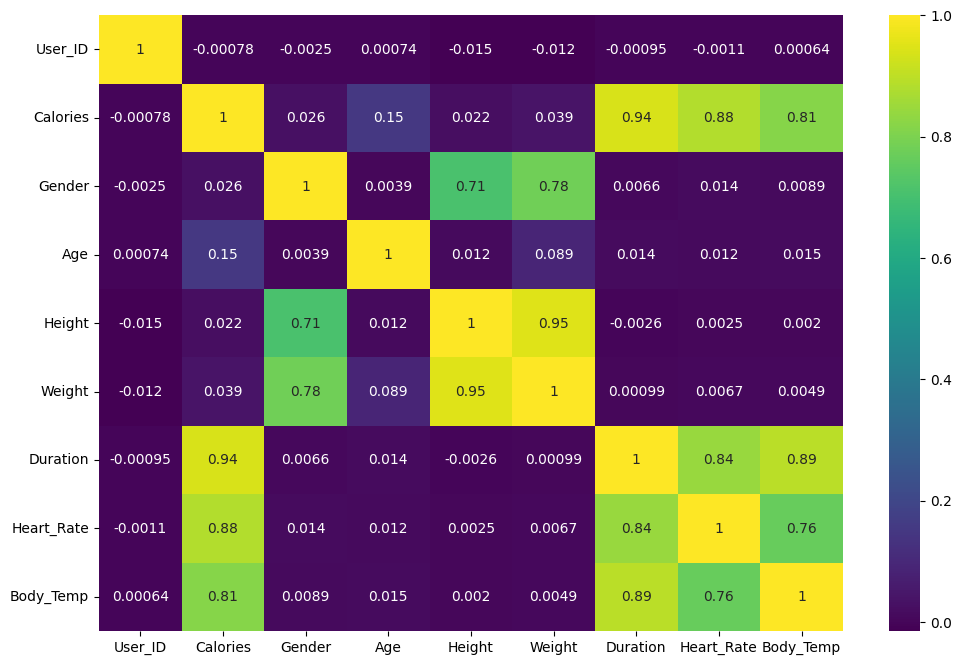

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cal_ex.corr(), annot=True, cmap='viridis')

plt.show()

# **Splitting**

In [ ]:
feature_columns = ["Gender", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]
label_column = ["Calories"]

x = cal_ex[feature_columns]
y = cal_ex[label_column]


# Feature Engineering
# Applying polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x = poly.fit_transform(x)

# Feature Scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# **Calling models**

In [ ]:
models_cal = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVM Regressor": SVR()
}


metrics_cal = {
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R²': []
}



# **Training and Testing**

  0%|          | 0/5 [00:00<?, ?it/s]

Linear Regression:
Mean Squared Error: 110.5326535698437
Mean Absolute Error: 4.455745588959189
Root Mean Squared Error: 10.513451078016375
R²: 0.9707500734948528



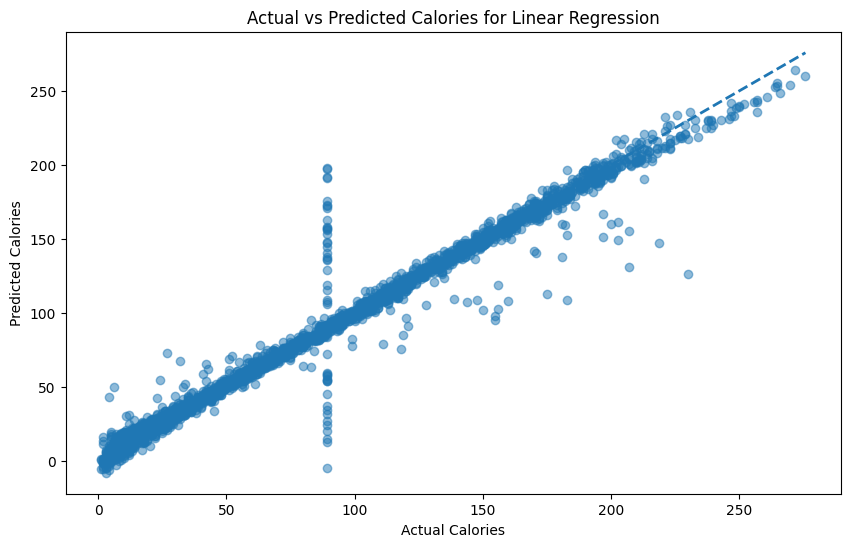

Decision Tree Regressor:
Mean Squared Error: 195.082083794587
Mean Absolute Error: 5.731744903202575
Root Mean Squared Error: 13.967178805850056
R²: 0.9483760099013905



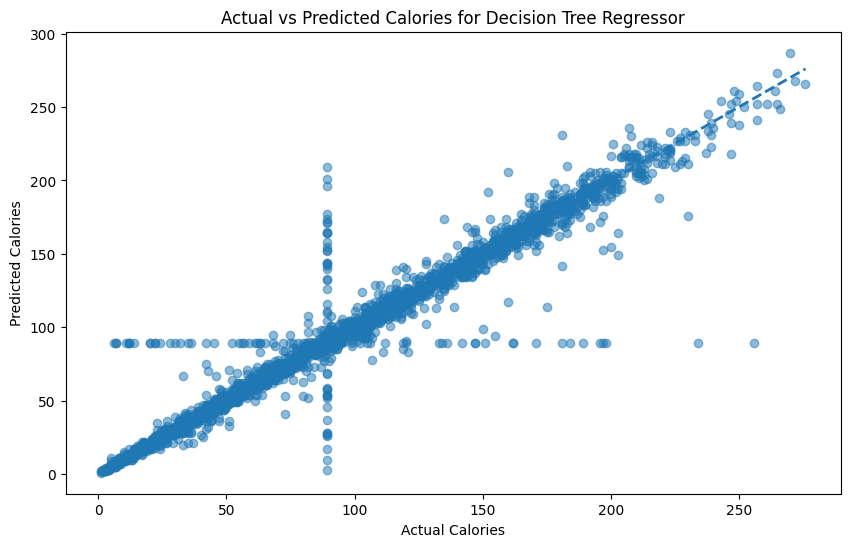

<ipython-input-13-2628f6584d06>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Random Forest Regressor:
Mean Squared Error: 96.27107172814532
Mean Absolute Error: 3.997559356514952
Root Mean Squared Error: 9.811782291110282
R²: 0.9745240733694982



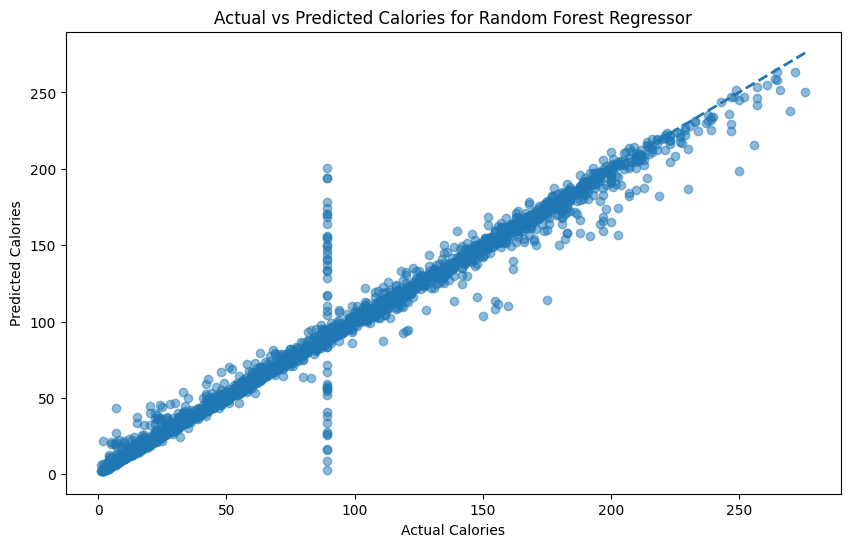

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor:
Mean Squared Error: 99.75247387683466
Mean Absolute Error: 4.3074793198961085
Root Mean Squared Error: 9.98761602570076
R²: 0.9736028003004528



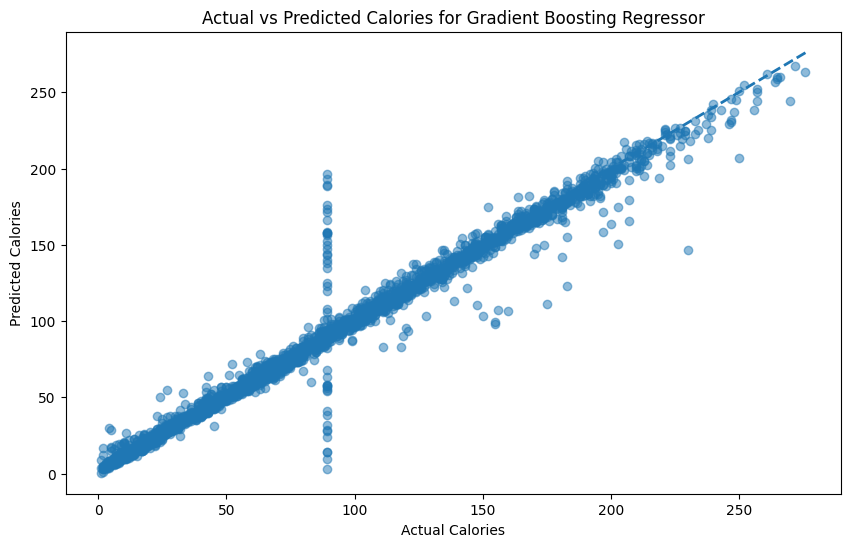

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Regressor:
Mean Squared Error: 139.84381257294478
Mean Absolute Error: 4.143815988434752
Root Mean Squared Error: 11.825557600931331
R²: 0.9629935488939153



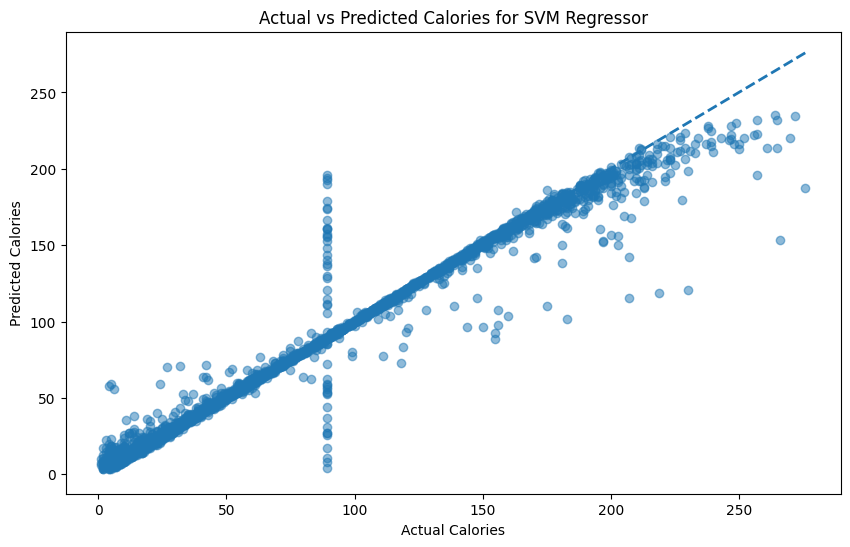

In [ ]:
model_names = []


for name, model in tqdm(models_cal.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R²: {r2}\n")

    # Store metrics
    metrics_cal['MSE'].append(mse)
    metrics_cal['MAE'].append(mae)
    metrics_cal['RMSE'].append(rmse)
    metrics_cal['R²'].append(r2)
    model_names.append(name)

     # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2)
    plt.title(f"Actual vs Predicted Calories for {name}")
    plt.xlabel("Actual Calories")
    plt.ylabel("Predicted Calories")
    plt.show()

# **Visualization**

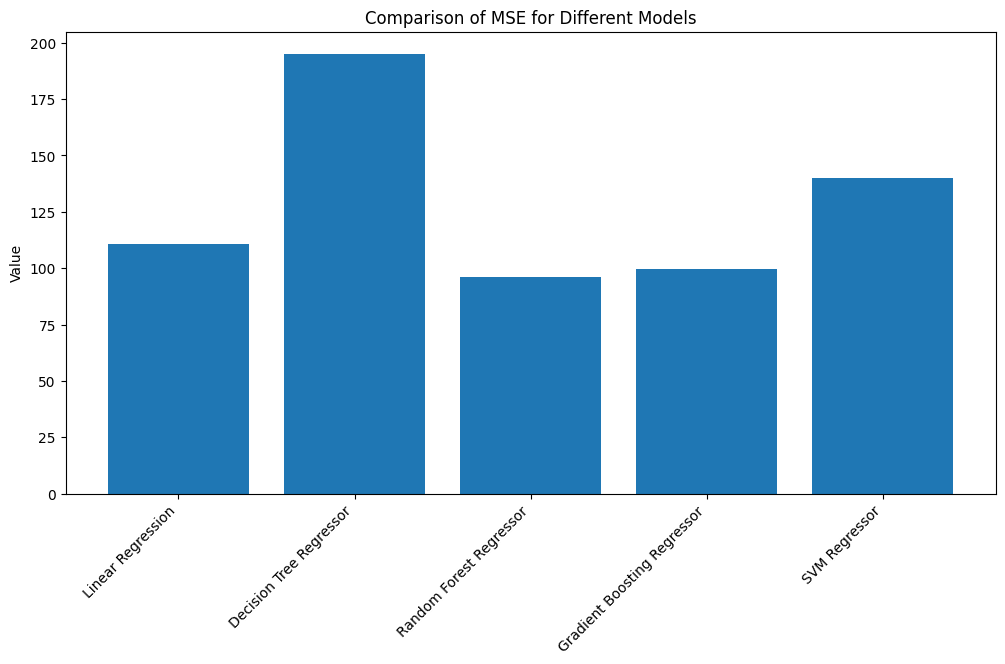

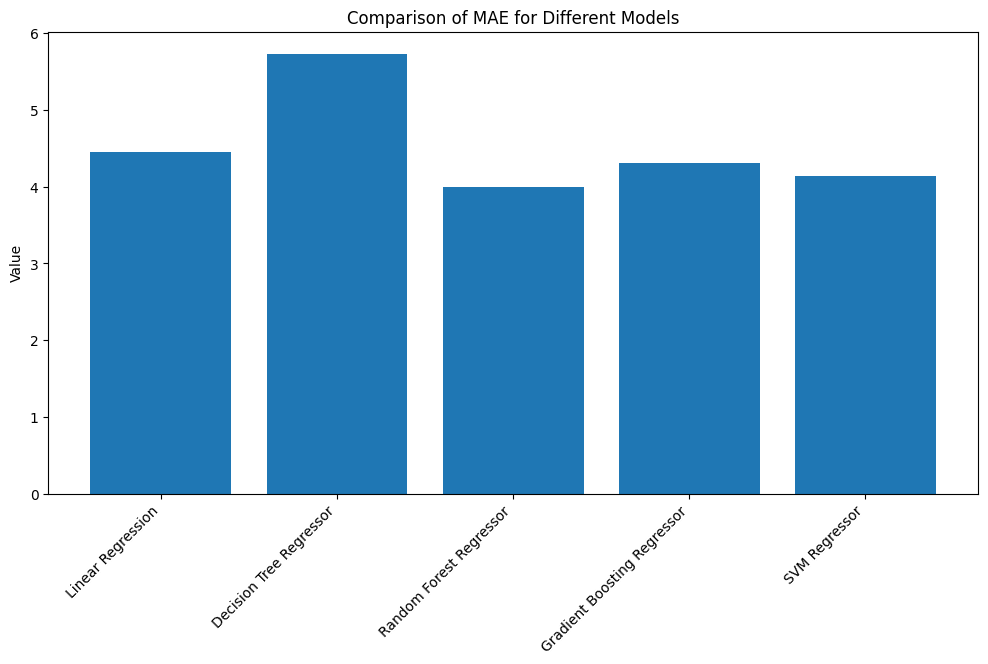

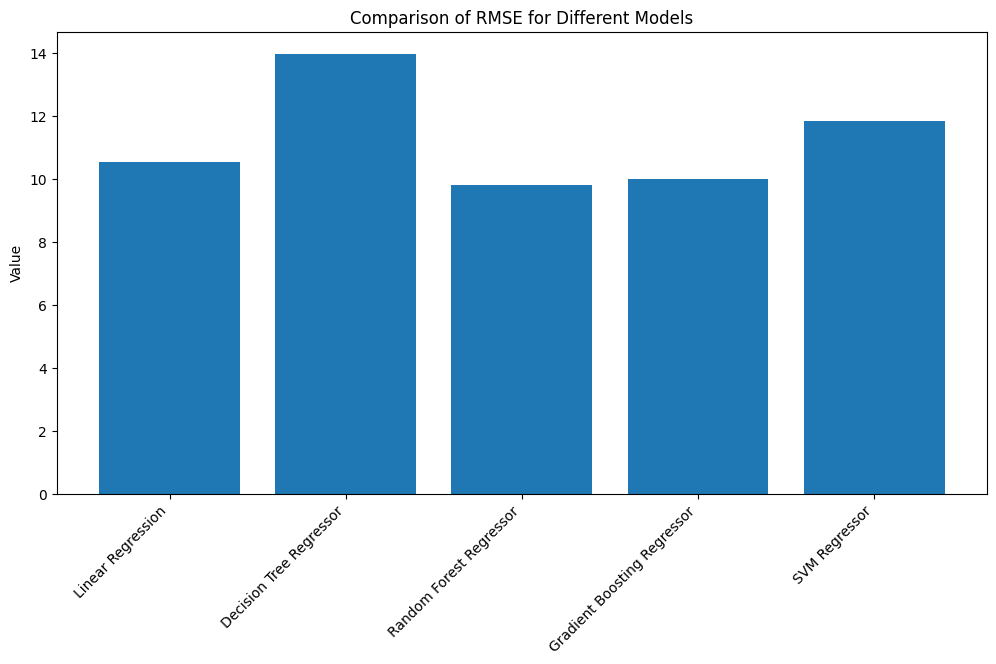

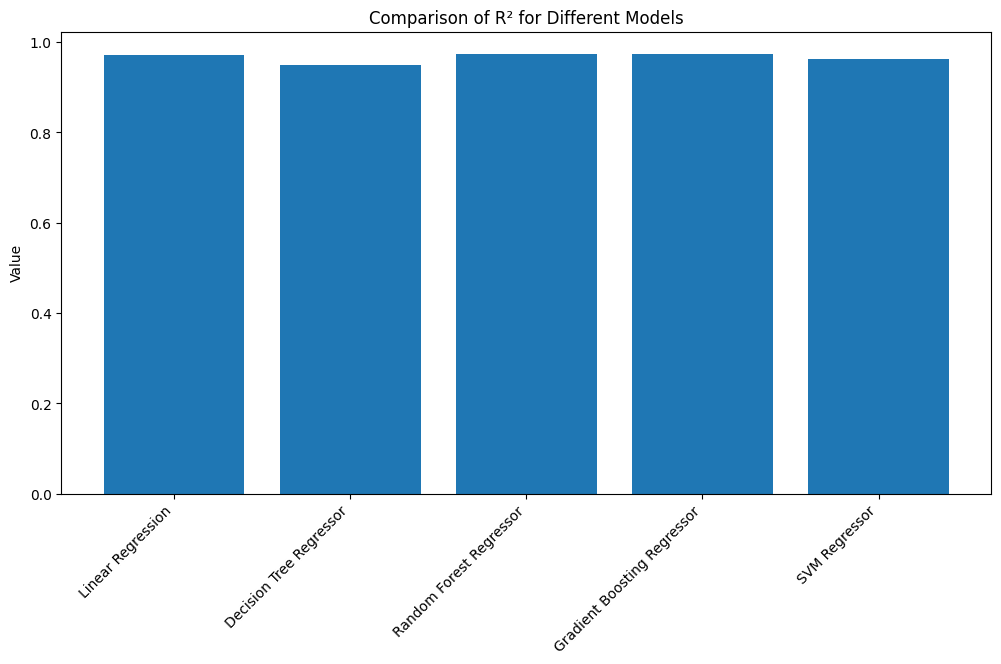

In [ ]:
# Function to plot bar charts for comparison
def plot_comparison(metrics, model_names, title):
    plt.figure(figsize=(12, 6))
    plt.bar(model_names, metrics)
    plt.title(title)
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot comparison for each metric
plot_comparison(metrics_cal['MSE'], model_names, 'Comparison of MSE for Different Models')
plot_comparison(metrics_cal['MAE'], model_names, 'Comparison of MAE for Different Models')
plot_comparison(metrics_cal['RMSE'], model_names, 'Comparison of RMSE for Different Models')
plot_comparison(metrics_cal['R²'], model_names, 'Comparison of R² for Different Models')


## **Calculating Optimized Duration of exercise for Body temperature => 40**

In [ ]:
# Feature Engineering: Create "Body_Temp =<40" binary feature
cal_ex["Body_Temp =<40"] = (cal_ex["Body_Temp"] <= 40).astype(int)

print(cal_ex)

        User_ID    Calories  Gender   Age  Height  Weight  Duration  \
0      14733363  231.000000       1  68.0   190.0    94.0      29.0   
1      11179863   26.000000       1  69.0   179.0    79.0       5.0   
2      16180408   89.233345       0  34.0   179.0    71.0      13.0   
3      17771927   35.000000       0  27.0   154.0    58.0      10.0   
4      15130815  123.000000       0  36.0   151.0    50.0      23.0   
...         ...         ...     ...   ...     ...     ...       ...   
14009  15644082   45.000000       0  20.0   193.0    86.0      11.0   
14010  17212577   23.000000       0  27.0   165.0    65.0       6.0   
14011  17271188   75.000000       0  43.0   159.0    58.0      16.0   
14012  18643037   11.000000       1  78.0   193.0    97.0       2.0   
14013  11751526   98.000000       1  63.0   173.0    79.0      18.0   

       Heart_Rate  Body_Temp  Body_Temp =<40  
0      105.000000       40.8               0  
1       88.000000       38.7               1  
2     

In [ ]:
feature_columns = ["Gender", "Age", "Height", "Weight", "Heart_Rate", "Body_Temp =<40"]
label_column = ["Duration"]

x = cal_ex[feature_columns]
y = cal_ex[label_column]

# Feature Engineering
# Applying polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x = poly.fit_transform(x)

# Feature Scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(x_train, y_train)
gb_pred = gb_regressor.predict(x_test)

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting Regression Metrics:")
print("Mean Absolute Error:", gb_mae)
print("Mean Squared Error:", gb_mse)
print("Root Mean Squared Error:", gb_rmse)
print("R-squared:", gb_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression Metrics:
Mean Absolute Error: 2.8463287812074145
Mean Squared Error: 12.693368770758084
Root Mean Squared Error: 3.562775430862586
R-squared: 0.8138154501352561


In [ ]:
new_individual = pd.DataFrame({
    "Gender": [1],
    "Age": [17],
    "Height": [175],
    "Weight": [60],
    "Heart_Rate": [90],
    "Body_Temp =<40": [0]  # Body temperature > 40
})

new_individual_poly = poly.transform(new_individual)
new_individual_scaled = scaler.transform(new_individual_poly)


predicted_duration = gb_regressor.predict(new_individual_scaled)
print("Predicted Optimal Duration:", predicted_duration[0])

Predicted Optimal Duration: 17.177637582191768
